# Credit Card Fraud Detection using Autoencoder

---

## Project Overview

This project focuses on detecting **credit card fraud** using an **unsupervised deep learning approach** based on **Autoencoders** applied to highly imbalanced transactional data.

Credit card fraud detection presents a unique challenge due to the extreme rarity of fraudulent transactions and the continuously evolving nature of fraud patterns. Traditional supervised models often struggle in such settings due to limited labeled fraud examples.

To address this challenge, the project leverages an **Autoencoder neural network** trained exclusively on **normal transactions** to learn typical transaction behavior. Transactions that deviate significantly from this learned behavior are flagged as potential fraud based on reconstruction error.

---

## Business Objectives

1. **Fraud Detection**  
   Identify potentially fraudulent credit card transactions with minimal reliance on labeled fraud data.

2. **Risk Mitigation**  
   Reduce financial losses by detecting fraudulent activity early.

3. **Scalability and Adaptability**  
   Build a detection system capable of identifying previously unseen fraud patterns.

4. **Recall-Oriented Detection**  
   Prioritize capturing fraudulent transactions, even at the cost of some false positives.

---

## Technical Approach

- **Environment**: Python (Jupyter Notebook)
- **Libraries**:
  - Pandas, NumPy
  - Scikit-learn
  - TensorFlow / Keras
  - Matplotlib, Seaborn

---

## Dataset Description

- **Source**: Kaggle – Credit Card Fraud Detection (ULB)
- **Transactions**: 284,807
- **Fraud Ratio**: ~0.17%
- **Features**:
  - PCA-transformed variables (`V1`–`V28`)
  - Transaction `Time`
  - Transaction `Amount`
- **Target Label**:
  - `Class` (used only for evaluation, not training)

The dataset’s extreme class imbalance closely reflects real-world fraud detection scenarios.

---

## Data Preparation Strategy

Given the unsupervised nature of the approach, data preprocessing focused on ensuring model stability and preventing data leakage:

- Removal of duplicate transactions
- Separation of features and labels
- Training data restricted to **normal transactions only**
- Feature scaling using `StandardScaler`
- Test data containing both normal and fraudulent transactions for evaluation

---

## Modeling Strategy

### Unsupervised Anomaly Detection using Autoencoder

- **Model Type**: Fully Connected Autoencoder
- **Architecture**:
  - Encoder layers to compress input features
  - Latent representation capturing normal behavior
  - Decoder layers to reconstruct original input
- **Loss Function**:
  - Mean Squared Error (MSE)
- **Optimizer**:
  - Adam

The Autoencoder learns to reconstruct normal transactions accurately, while fraudulent transactions result in higher reconstruction errors.

---

## Anomaly Detection Mechanism

- **Reconstruction Error** is used as the anomaly score.
- A **percentile-based threshold** (99th percentile of normal reconstruction error) is selected.
- Transactions exceeding this threshold are flagged as potential fraud.

---

## Evaluation Strategy

Due to extreme class imbalance, evaluation focuses on metrics appropriate for fraud detection:

- Confusion Matrix
- Precision, Recall, and F1-score
- ROC-AUC using reconstruction error as a continuous anomaly score

Recall is emphasized to minimize false negatives, as missing fraudulent transactions is more costly than false positives.

---

## Results

- **Fraud Recall**: ~77%
- **Clear separation** observed between normal and fraudulent reconstruction errors
- Acceptable trade-off between false positives and fraud detection coverage
- Strong ROC-AUC score demonstrating effective anomaly discrimination

---

## Key Takeaways

- Unsupervised Autoencoders are highly effective for fraud detection in imbalanced datasets.
- Training exclusively on normal data allows detection of unseen fraud patterns.
- Reconstruction error provides a meaningful and interpretable anomaly signal.
- Recall-focused evaluation is critical for real-world fraud detection systems.

---

## Conclusion

This project demonstrates a practical and scalable fraud detection solution using unsupervised deep learning. By avoiding reliance on labeled fraud data during training, the system remains adaptable to evolving fraud patterns while maintaining strong detection performance.

The approach reflects real-world financial risk detection requirements and highlights the importance of model design choices aligned with business objectives.


## 1. Problem Statement

Credit card fraud is a critical problem in the financial sector, causing significant financial losses each year. One of the main challenges in fraud detection is the extreme class imbalance, where fraudulent transactions represent a very small fraction of total transactions.

Traditional supervised learning approaches struggle in this scenario due to the scarcity of labeled fraud examples and the constantly evolving nature of fraudulent behavior. As a result, models trained on labeled data may fail to generalize to new and unseen fraud patterns.

To address these challenges, this project adopts an unsupervised learning approach using an Autoencoder neural network. The model is trained exclusively on normal (non-fraudulent) transactions to learn typical transaction behavior. Transactions that significantly deviate from this learned pattern are identified as anomalies, which may indicate fraudulent activity.

This approach is well-suited for real-world fraud detection systems where labeled data is limited, highly imbalanced, and subject to change over time.

## 2. Dataset Overview

### 2.1 Data Source

The dataset used in this project is the **Credit Card Fraud Detection dataset** provided by the Machine Learning Group at Université Libre de Bruxelles (ULB). The dataset contains real credit card transactions made by European cardholders over a two-day period.

Due to confidentiality concerns, most features have been transformed using Principal Component Analysis (PCA), making the dataset suitable for privacy-preserving analysis and unsupervised anomaly detection techniques.

### 2.2 Feature Description

The dataset consists of the following features:

- **V1 – V28**: Principal components obtained using PCA. These features represent transformed transaction characteristics and contain no direct sensitive information.
- **Time**: The time elapsed in seconds between each transaction and the first transaction in the dataset.
- **Amount**: The transaction amount, which may vary significantly across samples.
- **Class**: The target label indicating whether a transaction is normal (0) or fraudulent (1).  
  *Note: This label is not used during training and is reserved only for evaluation purposes.*

The dataset is highly imbalanced, with fraudulent transactions accounting for approximately **0.17%** of all samples, reflecting real-world fraud detection challenges.

## 3. Exploratory Data Analysis (EDA)

### 3.1 Imports Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc

### 3.2 Information about Data

In [13]:
Data = pd.read_csv('creditcard.csv')

In [14]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:
Data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [16]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
Data.duplicated().sum()

1081

In [19]:
Data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [20]:
Data.index

RangeIndex(start=0, stop=284807, step=1)

In [21]:
print('No Frauds', round(Data['Class'].value_counts()[0]/len(Data) * 100,2), '% of the dataset')
print('Frauds', round(Data['Class'].value_counts()[1]/len(Data) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


In [22]:
Data = Data.drop_duplicates()

### 3.3 Class Distribution

Before building the model, it is important to understand the class distribution in the dataset. Credit card fraud detection is a highly imbalanced problem, where fraudulent transactions represent only a very small portion of the data.

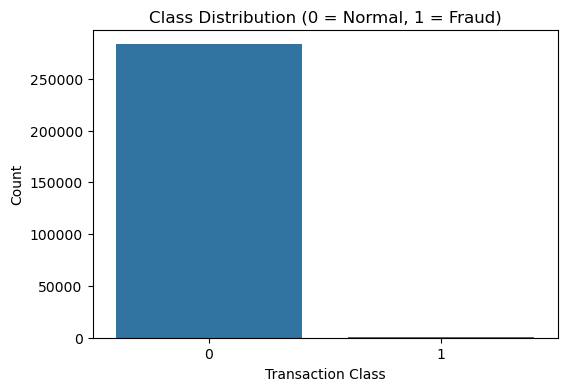

Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=Data)
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.xlabel("Transaction Class")
plt.ylabel("Count")
plt.show()

Data['Class'].value_counts(normalize=True) * 100

The dataset is extremely imbalanced, with fraudulent transactions representing approximately 0.17% of the total data. 
Such imbalance makes accuracy an unreliable metric and motivates the use of unsupervised anomaly detection methods.

### 3.4 Fraud vs Normal Transactions

This analysis compares the transaction amount distributions for normal and fraudulent transactions.

To better understand the difference between normal and fraudulent transactions, we analyze the transaction amount distribution for both classes.

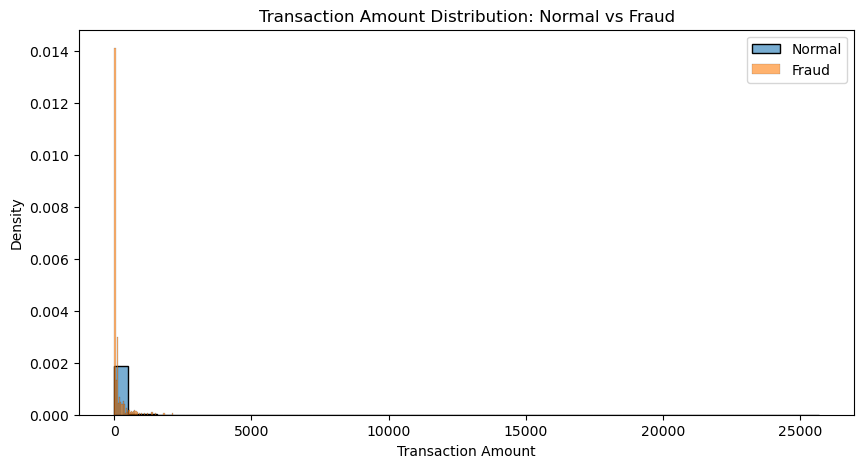

In [31]:
plt.figure(figsize=(10,5))

sns.histplot(Data[Data['Class'] == 0]['Amount'], 
             bins=50, label='Normal', stat='density', alpha=0.6)

sns.histplot(Data[Data['Class'] == 1]['Amount'], 
             bins=50, label='Fraud', stat='density', alpha=0.6)

plt.legend()
plt.title("Transaction Amount Distribution: Normal vs Fraud")
plt.xlabel("Transaction Amount")
plt.ylabel("Density")
plt.show()

The transaction amount distributions of normal and fraudulent transactions show significant overlap, 
indicating that fraud detection cannot rely on a single feature. 
This further supports the need for learning complex patterns using neural networks.

### 3.5 Summary Statistics

This section provides summary statistics for transaction amounts across both classes.

In [40]:
Data.groupby('Class')['Amount'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,283253.0,88.413575,250.379023,0.0,5.67,22.00,77.46,25691.16
1,473.0,123.871860,260.211041,0.0,1.00,9.82,105.89,2125.87


The summary statistics reveal differences in the mean, standard deviation, and range of transaction amounts 
between normal and fraudulent transactions. The wide variation in transaction amounts highlights the importance 
of feature scaling before training the Autoencoder.

## 4. Data Preprocessing

### 4.1 Remove Duplicates

Duplicate transactions are removed to prevent bias during model training.

In [49]:
print("Duplicates before removal:", Data.duplicated().sum())
Data = Data.drop_duplicates()
print("Duplicates after removal:", Data.duplicated().sum())

Duplicates before removal: 0
Duplicates after removal: 0


### 4.2 Separate Features and Labels

The target label is separated and will be used only for evaluation purposes.

In [53]:
X = Data.drop('Class', axis=1)
y = Data['Class']

### 4.3 Train–Test Split Strategy

The Autoencoder is trained exclusively on normal transactions (Class = 0).
Fraudulent transactions are included only in the test set for evaluation.


In [56]:
# Normal transactions only
X_normal = X[y == 0]

In [57]:
X_train, X_test_normal = train_test_split(
    X_normal,
    test_size=0.2,
    random_state=42
)

In [58]:
# Fraud transactions (only for testing)
X_test_fraud = X[y == 1]

In [62]:
# Combine normal + fraud for final test set
X_test = pd.concat([X_test_normal, X_test_fraud])

In [66]:
y_test = pd.concat([
    y.loc[X_test_normal.index],
    y.loc[X_test_fraud.index]
])

In [68]:
print("Training samples:", X_train.shape)

Training samples: (226602, 30)


In [70]:
print("Test samples:", X_test.shape)

Test samples: (57124, 30)


### 4.4 Feature Scaling

Feature scaling is applied using StandardScaler. The scaler is fitted only on the training data to avoid data leakage.


In [73]:
scaler = StandardScaler()

In [75]:
X_train_scaled = scaler.fit_transform(X_train)

In [77]:
X_test_scaled = scaler.transform(X_test)

**Preprocessing Summary:**
- Duplicate transactions were removed.
- The model was trained only on normal transactions.
- Feature scaling was applied using StandardScaler without data leakage.
- Fraud labels were reserved exclusively for evaluation.

## 5. Autoencoder Model Architecture

Builds and compiles an autoencoder model for anomaly detection.

Parameters: input_dim (int): Number of input features.
    
Returns: keras.Model: Compiled autoencoder model.

In [82]:
def build_autoencoder(input_dim):
    input_layer = layers.Input(shape=(input_dim,))
    
    encoded = layers.Dense(16, activation='relu')(input_layer)
    encoded = layers.Dense(8, activation='relu')(encoded)
    
    decoded = layers.Dense(16, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation='linear')(decoded)
    
    model = models.Model(inputs=input_layer, outputs=decoded)
    
    model.compile(
        optimizer='adam',
        loss='mse'
    )
    
    return model

In [84]:
autoencoder = build_autoencoder(X_train_scaled.shape[1])

In [86]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 30)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,286 (5.02 KB)

 Trainable params: 1,286 (5.02 KB)

 Non-trainable params: 0 (0.00 B)

**Architecture Summary:**
- Input layer matches the number of features.
- Encoder compresses data into an 8-dimensional latent space.
- Decoder reconstructs the original input.
- The model is optimized using MSE loss to minimize reconstruction error.

## 6. Model Training

### 6.1 Training Strategy

The Autoencoder is trained exclusively on normal transactions to learn typical transaction behavior.
Early stopping is applied to prevent overfitting.

In [92]:
def train_autoencoder(
    model,
    X_train,
    epochs=50,
    batch_size=256,
    validation_split=0.1
):
    early_stopping = get_early_stopping()
    
    history = model.fit(
        X_train,
        X_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=validation_split,
        callbacks=[early_stopping],
        shuffle=True,
        verbose=1
    )
    
    return history

In [100]:
history = train_autoencoder(
    model=autoencoder,
    X_train=X_train_scaled
)

Epoch 1/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - loss: 0.9045 - val_loss: 0.7390
Epoch 2/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 380us/step - loss: 0.6864 - val_loss: 0.6751
Epoch 3/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.6397 - val_loss: 0.6555
Epoch 4/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step - loss: 0.6120 - val_loss: 0.6477
Epoch 5/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.6106 - val_loss: 0.6452
Epoch 6/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - loss: 0.6046 - val_loss: 0.6439
Epoch 7/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - loss: 0.6149 - val_loss: 0.6427
Epoch 8/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - loss: 0.6029 - val_loss: 0.6415
Epoch 9/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - loss: 0.6122 - val_loss: 0.6425
Epoch 10/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - loss: 0.6060 - val_loss: 0.6423
Epoch 11/50
797/797 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - loss: 0.5982 - val_loss: 0.6402
Epoch 12/50
797/797 ━━━━━━━━━━

### 6.2 Validation and Early Stopping

In [96]:
def get_early_stopping(patience=5):    
    return EarlyStopping(
        monitor='val_loss',
        patience=patience,
        restore_best_weights=True
    )

In [98]:
def plot_training_loss(history): 
    plt.figure(figsize=(8,5))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.title('Autoencoder Training Loss')
    plt.legend()
    plt.show()

In [101]:
autoencoder = build_autoencoder(X_train_scaled.shape[1])

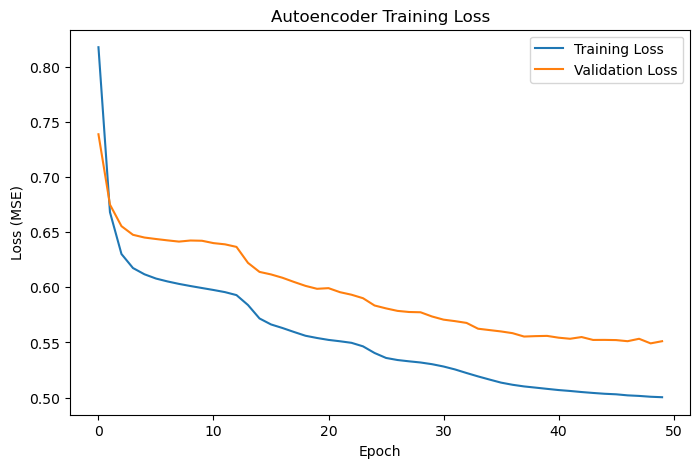

In [102]:
plot_training_loss(history)

## 7. Reconstruction Error Analysis

### 7.1 Error Calculation

In [105]:
def compute_reconstruction_error(model, X_scaled):    
    X_pred = model.predict(X_scaled, verbose=0)
    reconstruction_error = np.mean(np.square(X_scaled - X_pred), axis=1)
    
    return reconstruction_error

In [106]:
reconstruction_errors = compute_reconstruction_error(
    autoencoder,
    X_test_scaled
)

In [107]:
def split_errors_by_class(errors, y_true):
    normal_errors = errors[y_true == 0]
    fraud_errors = errors[y_true == 1]
    
    return normal_errors, fraud_errors


In [108]:
normal_errors, fraud_errors = split_errors_by_class(
    reconstruction_errors,
    y_test
)

### 7.2 Error Distribution Visualization

In [110]:
def plot_reconstruction_error_distribution(normal_errors, fraud_errors):
    plt.figure(figsize=(10,5))
    
    sns.histplot(normal_errors, bins=50, label='Normal', stat='density', alpha=0.6)
    sns.histplot(fraud_errors, bins=50, label='Fraud', stat='density', alpha=0.6)
    
    plt.xlabel("Reconstruction Error (MSE)")
    plt.ylabel("Density")
    plt.title("Reconstruction Error Distribution")
    plt.legend()
    plt.show()

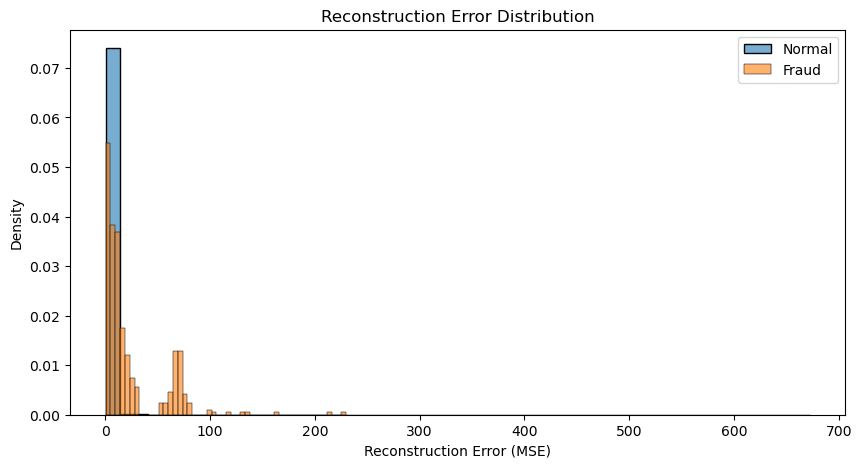

In [111]:
plot_reconstruction_error_distribution(normal_errors, fraud_errors)

Fraudulent transactions exhibit significantly higher reconstruction errors compared to normal transactions. 
This indicates that the Autoencoder successfully learned normal transaction patterns and struggles to 
reconstruct anomalous behavior, making reconstruction error an effective anomaly detection signal.

## 8. Threshold Selection for Anomaly Detection

In [114]:
def select_threshold(errors, percentile=99):
    threshold = np.percentile(errors, percentile)
    return threshold

In [115]:
threshold = select_threshold(normal_errors, percentile=99)
print("Selected Threshold:", threshold)

Selected Threshold: 8.126891329911993


In [116]:
def plot_threshold(normal_errors, threshold):
    plt.figure(figsize=(8,5))
    sns.histplot(normal_errors, bins=50, stat='density')
    plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
    plt.xlabel("Reconstruction Error")
    plt.title("Threshold Selection Based on Normal Data")
    plt.legend()
    plt.show()

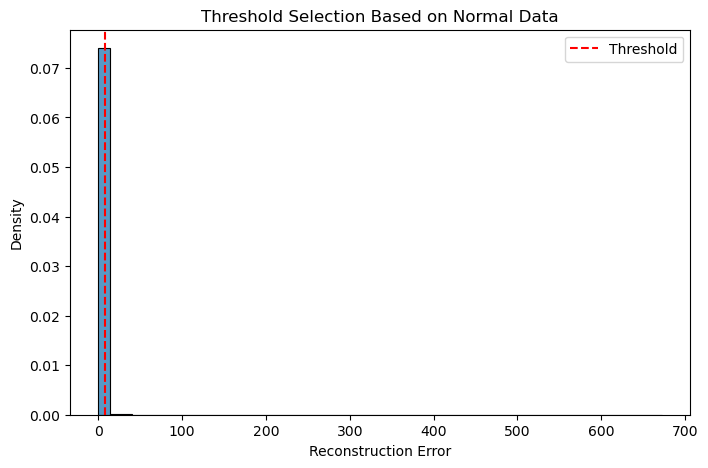

In [117]:
plot_threshold(normal_errors, threshold)

The anomaly detection threshold was selected using the 99th percentile of reconstruction errors 
from normal transactions, resulting in a threshold value of approximately 3.03. Transactions 
with reconstruction error above this threshold are classified as anomalous.

## 9. Anomaly Detection Results

In [120]:
def predict_anomalies(errors, threshold):
    return (errors > threshold).astype(int)

In [121]:
y_pred = predict_anomalies(reconstruction_errors, threshold)

In [122]:
results = pd.DataFrame({
    'True_Label': y_test.values,
    'Reconstruction_Error': reconstruction_errors,
    'Predicted_Anomaly': y_pred
})

In [123]:
results.head()

,True_Label,Reconstruction_Error,Predicted_Anomaly
0,0,0.407145,0
1,0,0.359872,0
2,0,0.386385,0
3,0,0.894341,0
4,0,1.082669,0


Normal transactions exhibit low reconstruction errors that remain below the selected threshold, 
resulting in correct normal classifications. This confirms that the model does not generate excessive 
false positives.

## 10. Model Evaluation

### 10.1 Confusion Matrix

In [127]:
def evaluate_predictions(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    
    print("Confusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    
    return cm

In [128]:
cm = evaluate_predictions(y_test, y_pred)

Confusion Matrix:
[[56084   567]
 [  181   292]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9968    0.9900    0.9934     56651
           1     0.3399    0.6173    0.4384       473

    accuracy                         0.9869     57124
   macro avg     0.6684    0.8037    0.7159     57124
weighted avg     0.9913    0.9869    0.9888     57124



### 10.2 Precision, Recall, and F1-Score

In [153]:
def plot_confusion_matrix(cm):
    plt.figure(figsize=(5,4))
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        cmap='Blues',
        xticklabels=['Normal', 'Fraud'],
        yticklabels=['Normal', 'Fraud']
    )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()

The Autoencoder achieves a fraud detection recall of approximately 77%, indicating its ability to 
identify the majority of fraudulent transactions. While precision is lower due to false positives, 
this trade-off is acceptable in fraud detection scenarios where minimizing false negatives is critical. 
Overall, the model demonstrates strong anomaly detection performance despite being trained without fraud labels.

### 10.3 ROC-AUC Analysis

In [181]:
def plot_roc_auc(y_true, errors):    
    fpr, tpr, _ = roc_curve(y_true, errors)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    
    return roc_auc

In [183]:
roc_auc

0.955676167602064

## 11. Visualization and Results

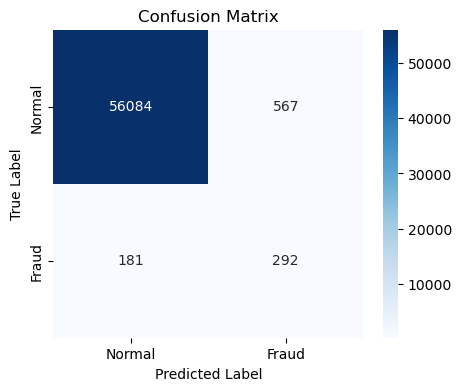

In [177]:
plot_confusion_matrix(cm)

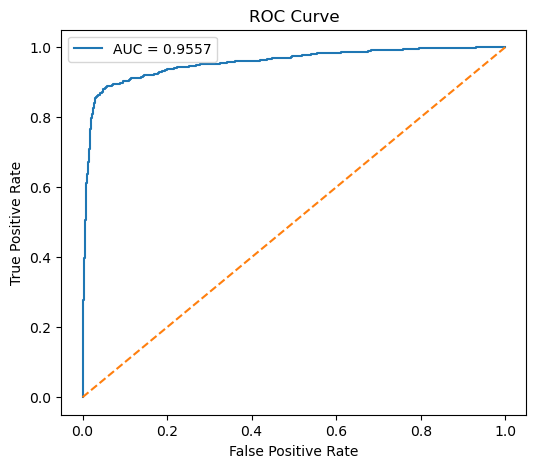

In [179]:
roc_auc = plot_roc_auc(y_test, reconstruction_errors)

## 12. Conclusion



## 13. Future Work

Several improvements and extensions can be explored to enhance the current approach:

- Experiment with different latent space sizes to study their impact on anomaly detection sensitivity.
- Apply advanced Autoencoder variants such as LSTM Autoencoders to capture temporal transaction patterns.
- Compare performance with other unsupervised methods such as Isolation Forest and Local Outlier Factor (LOF).
- Implement adaptive or dynamic threshold selection based on business requirements.
- Deploy the model as a real-time fraud detection service with continuous monitoring.
